In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv(r"C:\Users\itspark\Documents\Analytics\dataset/flight_data.csv")

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Let's do EDA

In [9]:
## Now we'll replace the Date_of_Journey column with separate journey day and journey month

df['Journey_day'] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [10]:
## Using Arrival Time creating new column for arrival hour and arrival min

df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35


In [15]:
## also create dep_hour and dep_min using Departure Time column

df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute

In [17]:
# now let's drop dep_time,journey_date and arrival_time column
df.drop(columns=['Date_of_Journey','Arrival_Time','Dep_Time'],inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [24]:
## Time taken to reach to the destination is considered as duration and the difference between 
##Departure time and Arrival Time

## Converting the duration column into list

duration = list(df.Duration)

len(duration)
duration[3]#just to check format

'5h 25m'

In [25]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    ## we're checking for duration of one hour
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m "  ## Adding 0 minutes
        elif 'm' in duration[i]:
            duration[i] = "0h {}".format(duration[i].strip())
            
#create seperate list for hours and min            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))   ## Here we're extracting hour from duration
    duration_mins.append(int(duration[i].split()[1][:-1]))   ## Here we're extracting only minutes from duration

In [28]:
# now create duration hours and min column susing above list
df['Duration_hours'] = duration_hours
df['Duration_mins'] = duration_mins

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [30]:
## Now we can drop duration column

df.drop(['Duration'], axis = 1, inplace = True)

In [31]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25


In [32]:
#checking Airline records
df.Airline.value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [33]:
df.Airline = df.Airline.apply(lambda x: x.strip())
airline_stats = df['Airline'].value_counts(ascending=False)
airline_stats

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
# we may apply dimensionallity reduction
airline_stats_less_than_10 = airline_stats[airline_stats<=10]
airline_stats_less_than_10

Jet Airways Business       6
Vistara Premium economy    3
Trujet                     1
Name: Airline, dtype: int64

In [37]:
df.Airline = df.Airline.apply(lambda x: 'other' if x in airline_stats_less_than_10 else x)


In [39]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
other                                  10
Name: Airline, dtype: int64

In [41]:
## Now let's check Route and Additional_info columns

df.Route

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [46]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [44]:
len(df[df.Additional_Info == 'No info'])

8344

In [45]:
df.shape

(10682, 15)

In [50]:
df.Route.value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
BLR ? BOM ? IXC ? DEL                   1
CCU ? IXB ? DEL ? BLR                   1
BLR ? HBX ? BOM ? AMD ? DEL             1
BOM ? GOI ? HYD                         1
Name: Route, Length: 128, dtype: int64

In [52]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [53]:
df.drop(columns=['Route', 'Additional_Info'], inplace = True)


In [56]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25


In [57]:
## after looking to Total_Stops we noticed that its a case of Ordinal categorical type so we'll perform Label Encoder

df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)

In [61]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_min',
       'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [62]:
## Now it's time for handling categorical data
test = df.copy()
test.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50


In [63]:
dfdummies = pd.get_dummies(data=df,columns=['Airline','Source','Destination'],drop_first = True)
dfdummies


,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,22,25,19,55,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,23,20,20,45,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,11,20,8,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,14,10,11,30,2,40,...,0,0,0,0,0,0,0,0,0,1


In [64]:
dfdummies.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_other', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [67]:
## Independent and dependent feature
x = dfdummies.drop('Price',axis=1)
y = dfdummies['Price']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 27)
(2137, 27)
(8545,)
(2137,)


In [77]:
## Now we'll apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
preds = rf_model.predict(x_test)
preds

array([ 5424.4       , 11622.25      , 13259.        , ...,
       14230.95      ,  6795.        ,  3761.86666667])

In [79]:
rf_model.score(x_train, y_train)


0.9436373953797863

In [81]:
rf_model.score(x_test, y_test)


0.7914247024315729

Text(0, 0.5, 'preds')

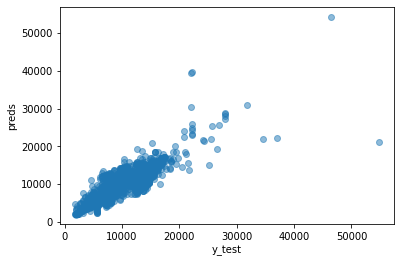

In [82]:
## Scatterplot

plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('preds')

In [84]:
## Evaluation
from sklearn import metrics

In [85]:
print('MAE: ', metrics.mean_absolute_error(y_test, preds))
print('MSE: ', metrics.mean_squared_error(y_test, preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, preds)))

print('r2_score: ', metrics.r2_score(y_test, preds))

MAE:  1238.8025839888287
MSE:  4278023.355427667
RMSE:  2068.338307779379
r2_score:  0.7914247024315728


In [89]:
## Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

In [90]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12 )]
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2,5,10,15,20,100]
min_samples_leaf = [1,2,5,6,7,10]

In [91]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20, 100], 'min_samples_leaf': [1, 2, 5, 6, 7, 10]}


In [93]:
rf_random_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, scoring = 'neg_mean_squared_error',
                                    n_iter = 10, cv = 5, verbose = 2, random_state = 1, n_jobs = 1)

In [94]:
rf_random_model.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, total=   2.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, total=   2.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, total=   2.8s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, total=   3.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=log2, max_depth=20, total=   2.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=5, total=   4.6s
[CV] n_estimators=800, min_sample

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=7, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=7, max_features=auto, max_depth=20, total=   2.1s
[CV] n_estimators=200, min_samples_split=20, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [ ]:
rf_random_model.best_params_


In [ ]:
predictions = rf_random_model.predict(x_test)


In [ ]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions) )
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('r2_score: ', metrics.r2_score(y_test, predictions))

In [69]:
## Important features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [70]:
print(sel.feature_importances_)


[0.22122028 0.14400818 0.05409802 0.0262738  0.01966988 0.02264324
 0.02013805 0.14070117 0.01848839 0.0070967  0.00184591 0.01745006
 0.14808177 0.01798758 0.00082424 0.00404221 0.00433843 0.05548131
 0.00049655 0.0023659  0.00363525 0.00916329 0.00416309 0.01621186
 0.01258665 0.0002751  0.0267131 ]


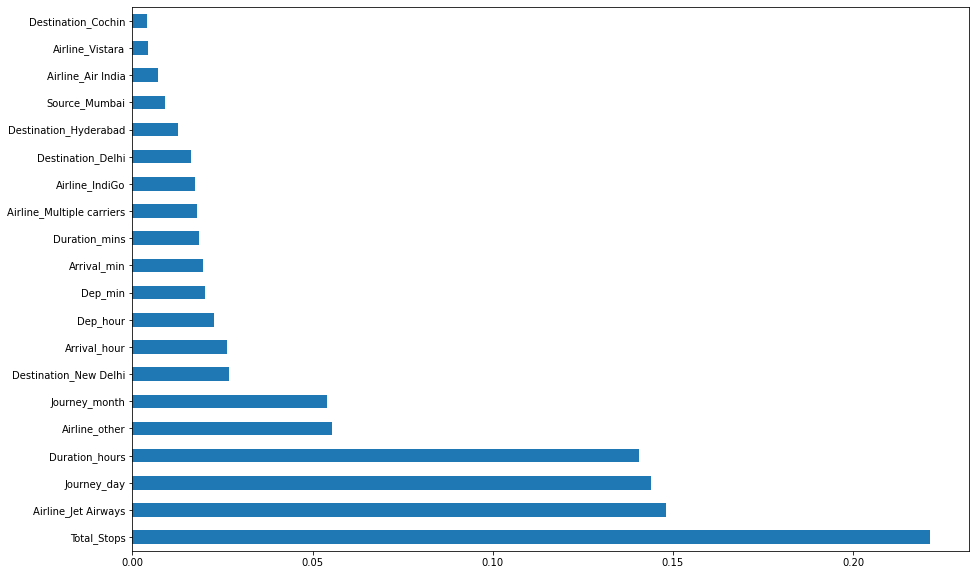

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
feature_imp = pd.Series(sel.feature_importances_, index = x.columns)
feature_imp.nlargest(20).plot(kind = 'barh')
plt.show()